# Folium: Exploratory Data Analysis through Visualization

In [1]:
import os                       # For working in different directories
import numpy as np              # Data Libraries
import pandas as pd             # Data Libraries
import matplotlib.pyplot as plt # Visualization Library
import seaborn as sns           # Visualization Library
import folium                   # Visualization Library
from folium.features import GeoJsonTooltip    # Visualization Library
import branca.colormap as cm    # adding color to visualization
import geopandas as gpd         # geospatial library 
import yaml                     # working w/ config file
from importnb import imports    # load other Jupyter Notebooks inside of this notebook                  

from sklearn.impute import KNNImputer   # Imputation of missing values

# Breweries

In [2]:
def load_breweries():
    """function to load pickled file containing breweries see `DenverCraftBreweries_breweries.ipynb` for origin.
    params: none
    returns: gdf_msa_coloradobrewerylist{GeoPandas GeoDataFrame} - unpickled GeoDataFrame
    """
    os.chdir('/home/jcorley60/Documents/project_portfolio/DenverCraftBreweries/\
data/Breweries/coloradobrewerylist')
    
    return pd.read_pickle('gdf_msa_coloradobrewerylist.pkl')
    
    
gdf_breweries = load_breweries()
gdf_breweries.head()

brewery         phone   
1                           12Degree Brewing  720-638-1623  \
118  Crystal Springs Brewing Company Taproom  720-572-7975   
172                          Gravity Brewing  303-544-0746   
258       Mother Tucker Brewery (Louisville)                 
2                 14er Brewing & Beer Garden  720-773-1437   

                                  website   
1                 http://www.12degree.com  \
118  http://www.crystalspringsbrewing.com   
172         http://thegravitybrewing.com/   
258        http://mothertuckerbrewery.com   
2            https://www.14erbrewing.com/   

                                               addr         city zipcode   
1            820 Main St, Louisville, CO 80027, USA   Louisville   80027  \
118          604 Main St, Louisville, CO 80027, USA   Louisville   80027   
172       1150 Pine St b, Louisville, CO 80027, USA   Louisville   80027   
258  1134 W Dillon Rd #4, Louisville, CO 80027, USA   Louisville   80027   
2        3120 Blake St Ste C, Denver, CO 80205, USA       Denver   80205   

           lat         lon                     geometry            GEO_ID   
1    39.978254 -105.131880  POINT (-105.13188 39.97825)  1600000US0846355  \
118  39.976030 -105.131831  POINT (-105.13183 39.97603)  1600000US0846355   
172  39.976069 -105.128315  POINT (-105.12831 39.97607)  1600000US0846355   
258  39.961916 -105.167051  POINT (-105.16705 39.96192)  1600000US0846355   
2    39.764880 -104.980193  POINT (-104.98019 39.76488)  1600000US0820000   

            NAMELSAD      ALAND   AWATER  num_major_roads  num_colleges   
1    Louisville city   20643693   288084                7             0  \
118  Louisville city   20643693   288084                7             0   
172  Louisville city   20643693   288084                7             0   
258  Louisville city   20643693   288084                7             0   
2        Denver city  396460127  4275563               57             3   

     num_medical_facilities  num_airports  
1                         1             0  
118                       1             0  
172                       1             0  
258                       1             0  
2                         8             1

# Geographies & Demographics Consolidation

### Merge Selected Census Data Profile (DP) variables w/ MSA Geometry to arrive at `Place` demographics w/ geometry
* result is 2021 ACS 5-year demographics for places w/in approximate Denver-Lakewood-Aurora MSA

### Load GeoPandas GeoDataFrame for MSA Places

In [3]:
os.chdir('/home/jcorley60/Documents/project_portfolio/DenverCraftBreweries/\
data/US Census Bureau/American Community Survey')
gdf_msa_places = pd.read_pickle('gdf_msa_places.pkl')
gdf_msa_places.drop('NAME', axis=1, inplace=True)
gdf_msa_places

GEO_ID              NAMELSAD     ALAND   AWATER   
0   1600000US0824950             Erie town  53222659   260609  \
1   1600000US0850026  Meridian Village CDP   1319424        0   
2   1600000US0869480      Shaw Heights CDP   1814251     2011   
3   1600000US0852350    Mountain View town    240817        0   
4   1600000US0812815       Centennial city  77035924   379304   
..               ...                   ...       ...      ...   
56  1600000US0816495    Commerce City city  94313381  1035683   
57  1600000US0809280       Broomfield city  85386685  1502572   
58  1600000US0842495         Lakeside town    485965   157267   
59  1600000US0830340         Glendale city   1471186     5724   
60  1600000US0850012          Meridian CDP   6636506        0   

                                             geometry  num_major_roads   
0   POLYGON ((-105.10469 40.01455, -105.10380 40.0...               11  \
1   POLYGON ((-104.83001 39.52793, -104.82992 39.5...                0   
2   POLYGON ((-105.05042 39.86008, -105.04054 39.8...                1   
3   POLYGON ((-105.06019 39.77661, -105.05325 39.7...                2   
4   MULTIPOLYGON (((-104.97913 39.56942, -104.9769...                9   
..                                                ...              ...   
56  MULTIPOLYGON (((-104.67805 39.91401, -104.6591...               20   
57  MULTIPOLYGON (((-105.10667 39.95783, -105.1073...               20   
58  POLYGON ((-105.06266 39.78385, -105.05318 39.7...                3   
59  POLYGON ((-104.94074 39.70634, -104.94068 39.7...                5   
60  MULTIPOLYGON (((-104.85366 39.53279, -104.8536...                2   

    num_colleges  num_medical_facilities  num_airports  num_breweries  
0              0                       0             1              2  
1              0                       0             0              0  
2              0                       0             0              0  
3              0                       0             0              0  
4              0                       1             0              6  
..           ...                     ...           ...            ...  
56             0                       0             0              0  
57             0                       0             0              4  
58             0                       0             0              0  
59             0                       0             0              1  
60             0                       0             0              0  

[61 rows x 10 columns]

### Load Pandas dataframe for Colorado `Place` Demographics

In [4]:
df_demographics = pd.read_pickle('colorado_place_demographics.pkl')
df_demographics

0              GEO_ID                             NAME  tot_hh  mar_hh   
0    1600000US0800320        Acres Green CDP, Colorado    1040     717  \
1    1600000US0800620      Aetna Estates CDP, Colorado     395     202   
2    1600000US0800760           Aguilar town, Colorado     271      56   
3    1600000US0800870  Air Force Academy CDP, Colorado     643     450   
4    1600000US0800925             Akron town, Colorado     763     345   
..                ...                              ...     ...     ...   
477  1600000US0886117           Woodmoor CDP, Colorado    3224    2633   
478  1600000US0886200        Woody Creek CDP, Colorado      69      42   
479  1600000US0886310              Wray city, Colorado     934     437   
480  1600000US0886475             Yampa town, Colorado     187     103   
481  1600000US0886750              Yuma city, Colorado    1233     606   

0    mar_hh_%  mar_child  mar_child_%  cohabit_hh  cohabit_hh_%   
0        68.9        353         33.9          14           1.3  \
1        51.1         38          9.6           0           0.0   
2        20.7          0          0.0          32          11.8   
3        70.0        317         49.3           7           1.1   
4        45.2        114         14.9          45           5.9   
..        ...        ...          ...         ...           ...   
477      81.7        902         28.0         142           4.4   
478      60.9          0          0.0           0           0.0   
479      46.8        215         23.0          91           9.7   
480      55.1         49         26.2           0           0.0   
481      49.1        264         21.4         115           9.3   

0    cohabit_child  ...  tot_pop_>=18  tot_pop_>=18_%  tot_pop_>=18_male   
0                0  ...          2152          2152.0               1216  \
1                0  ...           904           904.0                363   
2               25  ...           451           451.0                164   
3                7  ...          5174          5174.0               3516   
4               27  ...          1482          1482.0                761   
..             ...  ...           ...             ...                ...   
477              0  ...          7069          7069.0               3811   
478              0  ...           113           113.0                 69   
479             37  ...          1665          1665.0                857   
480              0  ...           336           336.0                194   
481             55  ...          2454          2454.0               1191   

0    tot_pop_>=18_male_%  tot_pop_>=18_female  tot_pop_>=18_female_%   
0                   56.5                  936                   43.5  \
1                   40.2                  541                   59.8   
2                   36.4                  287                   63.6   
3                   68.0                 1658                   32.0   
4                   51.3                  721                   48.7   
..                   ...                  ...                    ...   
477                 53.9                 3258                   46.1   
478                 61.1                   44                   38.9   
479                 51.5                  808                   48.5   
480                 57.7                  142                   42.3   
481                 48.5                 1263                   51.5   

0    tot_pop_white  tot_pop_white_%  tot_pop_hisp  tot_pop_hisp_%  
0             2221             81.3            63             2.3  
1              618             49.2           635            50.6  
2              322             67.5           323            67.7  
3             5079             82.3           598             9.7  
4             1603             89.4           281            15.7  
..             ...              ...           ...             ...  
477           7970             90.2           236   

### Merge Colorado Place Demographics & MSA Places 
* we can use the Pandas dataframe merge method which will retain the geospatial information/column found in a GeoPandas GeoDataFrame even when merged w/ a Pandas dataframe.

In [5]:
def get_select_vars_for_geometry(gdf_geometry, left_merge_col, df_demographics, right_merge_col):
    gdf_place_demographics = pd.merge(
        gdf_geometry, 
        df_demographics, 
        left_on=left_merge_col, 
        right_on=right_merge_col, 
        suffixes=["", "_"]
    )
    
    return gdf_place_demographics
    

gdf_place_demographics = get_select_vars_for_geometry(gdf_msa_places, 'GEO_ID', df_demographics, 'GEO_ID')

In [6]:
gdf_place_demographics.columns.to_list()

['GEO_ID',
 'NAMELSAD',
 'ALAND',
 'AWATER',
 'geometry',
 'num_major_roads',
 'num_colleges',
 'num_medical_facilities',
 'num_airports',
 'num_breweries',
 'NAME',
 'tot_hh',
 'mar_hh',
 'mar_hh_%',
 'mar_child',
 'mar_child_%',
 'cohabit_hh',
 'cohabit_hh_%',
 'cohabit_child',
 'cohabit_child_%',
 'hh_male',
 'hh_male_%',
 'hh_male_child',
 'hh_male_child_%',
 'hh_male_solo',
 'hh_male_solo_%',
 'hh_female',
 'hh_female_%',
 'hh_female_child',
 'hh_female_child_%',
 'hh_female_solo',
 'hh_female_solo_%',
 'tot_hh_avg_hh_size',
 'tot_hh_avg_fam_size',
 'pop_in_hh',
 'pop_in_hh_%',
 'edu_in_college',
 'edu_in_college_%',
 'edu_attain_>=25',
 'edu_hs',
 'edu_hs_%',
 'edu_some_col',
 'edu_some_col_%',
 'edu_as',
 'edu_as_%',
 'edu_bs',
 'edu_bs_%',
 'edu_grad_prof',
 'edu_grad_prof_%',
 'edu_>=_hs',
 'edu_>=_hs_%',
 'edu_>=_bs',
 'edu_>=_bs_%',
 'veteran',
 'veteran_%',
 'diff_res_1yr',
 'diff_res_1yr_%',
 'tot_pop_>=16',
 'in_laborforce',
 'in_laborforce_%',
 'notin_laborforce',
 'noti

In [7]:
def create_empty_dataframes(num_dfs):
    """Helper function to create empty Pandas dataframes for ease of use of 'create_derived_variables'"""
    
    # Create a list of empty DataFrames to avoid possible fragmentation/performance issue later
    empty_dfs = [pd.DataFrame() for _ in range(num_dfs)]

    return empty_dfs


empty_dfs = create_empty_dataframes(7)

In [8]:
age_ranges = ['20-24', '25-34', '35-44']
hhinc_ranges = ['75k-99.999k','100k-149.999k','150k-199.999k','>=200k']

def create_derived_variables(gdf, age_ranges, hhinc_ranges, pickle=True):
    """Creates important derived variables, which use variables in gdf_place_demographics.
    params:
    gdf{geodataframe} - this is gdf_place_demographics
    age_ranges{list} - list of age bands, where the bands must follow the convention observed in 
        gdf_place_demographics
    hhinc_rangesP{list} - list of household income bands, where the bands must follow the convention observed in 
        gdf_place_demographics
    pickle{bool} - if True pickles gdf_place_demographics
    """
    # Create several variables from existing columns
    # change area units from meters^2 to miles^2: 1 mi^2= 2589988 m^2
    # https://www.metric-conversions.org/area/square-miles-to-square-meters.htm
    gdf['ALAND'] = gdf['ALAND'] / 2589988
    gdf['AWATER'] = gdf['AWATER'] / 2589988
    
    # access each empty DataFrame by index in list -- see help function `create_empty_dataframes` above
    gdf_1, gdf_2, gdf_3, gdf_4, gdf_5, gdf_6, gdf_7 = empty_dfs[0], empty_dfs[1], empty_dfs[2], empty_dfs[3], empty_dfs[4], empty_dfs[5], empty_dfs[6]
    
    
    gdf_1['avg_pop_density_>=21'] = gdf['tot_pop_>=21'] / gdf['ALAND']
    
    # Create col which sums up all desired occupations (by location) which are known to consume more beer on avg
    gdf_2['target_occs'] = gdf[
        [col for col in gdf.columns.values if 'occ_>=16' in col and '%' not in col]
    ].sum(axis=1)

    gdf_3['target_occs_%'] = gdf[
        [col for col in gdf.columns.values if 'occ_>=16' in col and '%' in col]
    ].sum(axis=1)

    # Target Ages
    select_age_columns = [
        col for col in gdf.columns if '%' not in col and any(
            f'tot_pop_{age_range}' in col for age_range in age_ranges)
    ]

    select_age_columns_perc = [
        col for col in gdf.columns if '%' in col and any(
            f'tot_pop_{age_range}' in col for age_range in age_ranges)
    ]

    gdf_4['target_age'] = gdf[select_age_columns].sum(axis=1)
    gdf_5['target_age_%'] = gdf[select_age_columns_perc].sum(axis=1)

    # Target Household Income Levels
    select_hhinc_columns = [
        col for col in gdf.columns if '%' not in col and any(
            f'hhinc_{hhinc_range}' in col for hhinc_range in hhinc_ranges)
    ]
    select_hhinc_columns_perc = [
        col for col in gdf.columns if '%' in col and any(
            f'hhinc_{hhinc_range}' in col for hhinc_range in hhinc_ranges)
    ]

    gdf_6['target_hhinc'] = gdf[select_hhinc_columns].sum(axis=1)
    gdf_7['target_hhinc_%'] = gdf[select_hhinc_columns_perc].sum(axis=1)
    
    # Improve performance and address possible fragmentation issue(s) via concatenating individual columns
    gdf = pd.concat([gdf, gdf_1, gdf_2, gdf_3, gdf_4, gdf_5, gdf_6, gdf_7], axis=1)

    # Pickle for later use
    if pickle is True:
        os.chdir('/home/jcorley60/Documents/project_portfolio/DenverCraftBreweries/\
data/US Census Bureau/American Community Survey')
        gdf.to_pickle('gdf_place_demographics.pkl')
    
    return gdf

    
gdf_place_demographics = create_derived_variables(gdf_place_demographics, age_ranges, hhinc_ranges, pickle=True)
gdf_place_demographics = gdf_place_demographics.copy()    # defragments gdf/df
gdf_place_demographics

GEO_ID              NAMELSAD      ALAND    AWATER   
0   1600000US0824950             Erie town  20.549384  0.100622  \
1   1600000US0850026  Meridian Village CDP   0.509432  0.000000   
2   1600000US0869480      Shaw Heights CDP   0.700486  0.000776   
3   1600000US0852350    Mountain View town   0.092980  0.000000   
4   1600000US0812815       Centennial city  29.743738  0.146450   
..               ...                   ...        ...       ...   
56  1600000US0816495    Commerce City city  36.414602  0.399879   
57  1600000US0809280       Broomfield city  32.967985  0.580146   
58  1600000US0842495         Lakeside town   0.187632  0.060721   
59  1600000US0830340         Glendale city   0.568028  0.002210   
60  1600000US0850012          Meridian CDP   2.562369  0.000000   

                                             geometry  num_major_roads   
0   POLYGON ((-105.10469 40.01455, -105.10380 40.0...               11  \
1   POLYGON ((-104.83001 39.52793, -104.82992 39.5...                0   
2   POLYGON ((-105.05042 39.86008, -105.04054 39.8...                1   
3   POLYGON ((-105.06019 39.77661, -105.05325 39.7...                2   
4   MULTIPOLYGON (((-104.97913 39.56942, -104.9769...                9   
..                                                ...              ...   
56  MULTIPOLYGON (((-104.67805 39.91401, -104.6591...               20   
57  MULTIPOLYGON (((-105.10667 39.95783, -105.1073...               20   
58  POLYGON ((-105.06266 39.78385, -105.05318 39.7...                3   
59  POLYGON ((-104.94074 39.70634, -104.94068 39.7...                5   
60  MULTIPOLYGON (((-104.85366 39.53279, -104.8536...                2   

    num_colleges  num_medical_facilities  num_airports  num_breweries  ...   
0              0                       0             1              2  ...  \
1              0                       0             0              0  ...   
2              0                       0             0              0  ...   
3              0                       0             0              0  ...   
4              0                       1             0              6  ...   
..           ...                     ...           ...            ...  ...   
56             0                       0             0              0  ...   
57             0                       0             0              4  ...   
58             0                       0             0              0  ...   
59             0                       0             0              1  ...   
60             0                       0             0              0  ...   

   tot_pop_white_%  tot_pop_hisp  tot_pop_hisp_%  avg_pop_density_>=21   
0             88.4          2717             9.3            959.396137  \
1             72.7            90             3.3           3623.640201   
2             66.6          2561            45.3           5426.230653   
3             86.4           178            27.5           5345.237404   
4             82.9          9693             9.0           2677.639257   
..             ...           ...             ...                   ...   
56            73.3         29896            48.6           1094.231389   
57            83.0          9409            12.9           1649.812700   
58           100.0             0             0.0             42.636618   
59            63.8           818            17.8           7166.898780   
60            62.5           440             8.9           1683.598001   

    target_occs  target_occs_%  target_age  target_age_%  target_hhinc   
0          8952           59.3        9447          32.2          7810  \
1           808           51.4        1087          39.6           834   
2          1713           56.5        2183          38.6           890   
3           208           51.1         324          50.0           179   
4         30623           53.3       33042          30.6         28194   
..          ...            ...         ...        

## Identify Important Missing Values for MSA

In [9]:
gdf_place_demographics[gdf_place_demographics['hhinc_median'] == -666666666][['GEO_ID', 'NAMELSAD', 'hhinc_median']]

GEO_ID                NAMELSAD  hhinc_median
9   1600000US0822575  East Pleasant View CDP    -666666666
40  1600000US0854750    North Washington CDP    -666666666
58  1600000US0842495           Lakeside town    -666666666

#### Interpolate Missing Values via K-Nearest Neighbors
* 3-missing values discovered above w/ `hhinc_media`= -666,666,666
* `hhinc_median` provides a much better choropleth than Per Capita Income which factors in children and retirees who haven't worked in years

[122679.0, 89510.5, 76699.66666666667, 69637.0, 68635.0]
[56342.0, 53710.0, 51956.333333333336, 55124.0, 59584.4]
[56342.0, 53710.0, 51956.333333333336, 55124.0, 57645.0]


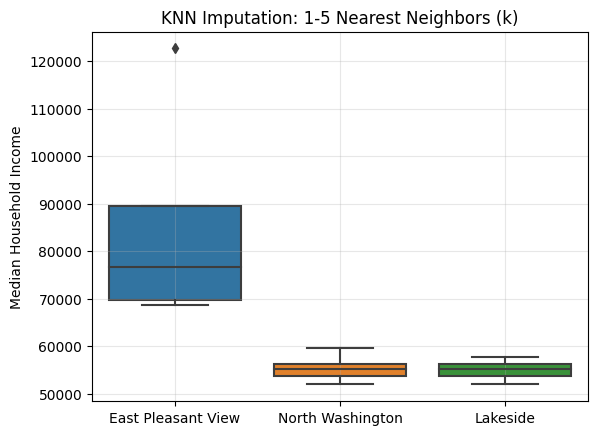

In [10]:
def carryout_knn_imputation(gdf):
    """Function to impute missing `hhinc_median` values which play an important role in a subsequent
    choropleth plot visualization of said variable.
    params: gdf{geodataframe} - gdf_place_demographics
    returns: none, carries out imputation on missing df column values inplace. Creates boxplot of KNN imputed values
    with a varying number of k nearest neighbors
    """
    gdf['hhinc_median'].replace(-666666666, np.NaN, inplace=True)
    data_copy = gdf.copy()
    impute_column = "hhinc_median"
    columns_to_include = [
        'ALAND', 'tot_hh', 'mar_hh', 'cohabit_hh', 'tot_hh_avg_hh_size', 'tot_hh_avg_fam_size', 'pop_in_hh', 
        'edu_in_college','edu_attain_>=25','edu_hs', 'edu_some_col', 'edu_as', 'edu_bs', 'edu_grad_prof', 'edu_>=_hs', 
        'edu_>=_bs', 'edu_grad_prof', 'tot_pop_>=16', 'in_laborforce', 'notin_laborforce', 'hhinc_<10K', 
        'hhinc_10k-14.999k', 'hhinc_15k-24.999k', 'hhinc_25k-34.999k', 'hhinc_35k-44.999k', 'hhinc_50k-74.999k', 
        'hhinc_75k-99.999k', 'hhinc_100k-149.999k', 'hhinc_150k-199.999k', 'hhinc_>=200k', 'hhinc_mean', 
        'hhearnings_mean', 'faminc_median', 'faminc_mean', 'inc_per_capita', 'hhinc_nonfam', 'hhinc_nonfam_median', 
        'hhinc_nonfam_mean', 'inc_workers_median', 'tot_housing_units', 'units_occupied', 'units_vacant', 
        'homeowner_vacancy_rate', 'rental_vacancy_rate', 'tot_pop', 'tot_pop_male_%', 'tot_pop_female_%', 
        'tot_pop_20-24',  'tot_pop_25-34', 'tot_pop_35-44', 'tot_pop_45-54', 'tot_pop_55-59', 'tot_pop_60-64', 
        'tot_pop_>=21', 'tot_pop_white_%', 'tot_pop_hisp_%', 'target_occs'
    ]

    impute_data = data_copy[columns_to_include + [impute_column]]

    k_list = [i for i in np.arange(1, 6, 1)]
    epv, nw, lakeside = [], [], []
    for k in k_list:
        imputer = KNNImputer(n_neighbors=k, weights="uniform", metric='nan_euclidean')
        imputed_values = imputer.fit_transform(impute_data)
        imputed_column = imputed_values[:, -1]                  # Extract imputed values for the target column
        data_copy[impute_column] = imputed_column  # Replace missing values in the original DataFrame

        epv.append(data_copy.iloc[9]['hhinc_median'])
        nw.append(data_copy.iloc[40]['hhinc_median'])
        lakeside.append(data_copy.iloc[58]['hhinc_median'])

    imp_val_list = [epv, nw, lakeside]
    [print(i) for i in imp_val_list]

    # TODO: add chart and y-axis titles
    ax = sns.boxplot(imp_val_list)
    ax.set_xticklabels(['East Pleasant View', 'North Washington', 'Lakeside'])
    plt.title("KNN Imputation: 1-5 Nearest Neighbors (k)")
    plt.ylabel('Median Household Income')
#     plt.xlabel('East Pleasant View, North Washington, and Lakeside')
    plt.grid(alpha=0.3)

    imputer = KNNImputer(n_neighbors=2, weights="uniform", metric='nan_euclidean')
    imputed_values = imputer.fit_transform(impute_data)
    imputed_column = imputed_values[:, -1]                  # Extract imputed values for the target column
    gdf[impute_column] = imputed_column  # Replace missing values in the original DataFrame

    # check imputed values
    gdf.iloc[[9, 40, 58]][['GEO_ID', 'NAMELSAD', 'hhinc_median']]

    os.chdir('/home/jcorley60/Documents/project_portfolio/DenverCraftBreweries/\
data/US Census Bureau/American Community Survey')
    gdf.to_pickle('gdf_place_demographics.pkl')
    plt.savefig('KNNImputation_hhinc_median.png')
    
    
carryout_knn_imputation(gdf_place_demographics)

# Folium Geospatial Exploration
* https://stackoverflow.com/questions/69170367/python-folium-choropleth-typeerror-ufunc-isnan-not-supported
    - see for assistance w/ determining `key_on` parameter, however, GeoJSON files (often encountered as JSON files) will have a very similar structure from 1 GeoJSON to another
* check GeoJSON structure via
    - d = json.loads(gdf_msa_places.to_json())

#### Map desired variables to specific choropleths w/in Folium

In [11]:
def create_choro_mapping_dict(df_org, df_labels):
    """This dictionary maps the choropleth key column to it's corresponding values which are variables
    from 'variableMapping_acs_2021_5yr_data_dictionary.xlsx'
    For example category 'Population' has/displays variables ['tot_pop_>=21', 'pop_density_>=21', etc.]
    params:
    df_org{dataframe} - df of mapped variables to categories
    df_labels{dataframe} - df of variables and their descriptions/labels
    returns:
    dict_choro_map{dictionary} - dictionary consisting of choropleth categorical keys and their respective 
    variable values.
    """
    dict_choro_map = dict()

    # we are sure to not loop through the entire dataframe for efficiency, just converted lists
    # get all categories of variables (see tab 'organized mapped variables' from XLSX mentioned above)
    for col in df_org.columns.to_list():
        # we start w/ a DF which must be symmetrical, however, our categories have different #'s of variables
        variables = df_org[col][df_org[col].notna()].to_list()    
        
        variable_labels = []
        for var in variables:    # get label for each variable
            variable_labels.append(df_labels[df_labels['column name'] == var]['label'].values[0])

        dict_choro_map[col] = {'var': variables, 'var_lab': variable_labels}
        
    return dict_choro_map


# load overarching variable organization & labels mapped to their respective variables
df_choro_map = pd.read_excel(
    'variableMapping_acs_2021_5yr_data_dictionary.xlsx', 
    sheet_name='organized mapped variables'
)
df_choro_labels = pd.read_excel(
    'variableMapping_acs_2021_5yr_data_dictionary.xlsx', 
    sheet_name='variable mapping'
)

df_choro_labels = df_choro_labels[df_choro_labels['column name'].notna()][['column name', 'label']]
dict_choro_map = create_choro_mapping_dict(df_choro_map, df_choro_labels)
dict_choro_map

{'Income': {'var': ['target_hhinc',
   'target_hhinc_%',
   'hhinc_median',
   'hhinc_mean',
   'hhinc_nonfam',
   'inc_workers_median',
   'tot_hh',
   'hhinc_<10K_%',
   'hhinc_10k-14.999k_%',
   'hhinc_15k-24.999k_%',
   'hhinc_25k-34.999k_%',
   'hhinc_35k-44.999k_%',
   'hhinc_50k-74.999k_%',
   'hhinc_75k-99.999k_%',
   'hhinc_100k-149.999k_%',
   'hhinc_150k-199.999k_%',
   'hhinc_>=200k_%',
   'hhinc_nonfam_median',
   'hhinc_nonfam_mean',
   'faminc_median',
   'faminc_mean'],
  'var_lab': ['Target household incomes ≥$75K:',
   'Target household incomes ≥$75K (% of all incomes):',
   'Median Household Income ($):',
   'Mean Household Income ($):',
   'Nonfamily households:',
   'Median earnings for workers ($):',
   'Total Households:',
   'Total Households < $10K \n(% of total households):',
   'Total Households $10K - $14.999K \n(% of total households):',
   'Total Households $15K - $24.999K \n(% of total households):',
   'Total Households $25K - $34.999K \n(% of total hous

In [12]:
# The following code cell comes from:
# https://stackoverflow.com/questions/56164535/adding-colormap-legend-to-folium-map
# Adapted from: https://nbviewer.org/gist/BibMartin/f153aa957ddc5fadc64929abdee9ff2e
from branca.element import MacroElement
from jinja2 import Template


class BindColormap(MacroElement):
    """Binds a colormap to a given layer.  This enables switching between dataset layers w/ different respective 
    choropleth color mappings.
    Parameters
    ----------
    colormap : branca.colormap.ColorMap
        The colormap to bind.
    """
    def __init__(self, layer, colormap):
        super(BindColormap, self).__init__()
        self.layer = layer
        self.colormap = colormap
        self._template = Template(u"""
        {% macro script(this, kwargs) %}
            {{this.colormap.get_name()}}.svg[0][0].style.display = 'block';
            {{this._parent.get_name()}}.on('layeradd', function (eventLayer) {
                if (eventLayer.layer == {{this.layer.get_name()}}) {
                    {{this.colormap.get_name()}}.svg[0][0].style.display = 'block';
                }});
            {{this._parent.get_name()}}.on('layerremove', function (eventLayer) {
                if (eventLayer.layer == {{this.layer.get_name()}}) {
                    {{this.colormap.get_name()}}.svg[0][0].style.display = 'none';
                }});
        {% endmacro %}
        """)  # noqa

In [13]:
def concat_string_to_list(string1, list1):
    """Helper function for 'generate_folium_choropleth'.
    Given a list and a string this function concatenates the string to the beginning of the given list.
    Be sure to generate fresh dictionary after concatenating `NAMELSAD` to avoid runtime issue."""
    list1.insert(0, string1)
    return list1

def create_brewery_markers(gdf_breweries, folium_base_map, color, size=3):
    """Adds venues as circle markers
    params:
    gdf_breweries{geodataframe} - geodataframe from which latitude, longitude and brewery name are derived
    folium_base_map{folium map object} - base map upon which markers are drawn
    color{str} - desired color for brewery markers
    size{int} - desired brewery marker size, default size of 3
    returns:
    brewery_layer{folium layer object} - layer object contains brewery markers
    """
    
    # create new layer
    brewery_layer = folium.FeatureGroup(
        name='Breweries', 
        overlay=True, 
        control=True, 
        show=True
    ).add_to(folium_base_map)
    
    # create brewery markers and add to folium_base_map
    for lat, lon, name in zip(gdf_breweries.lat.to_list(), 
                              gdf_breweries.lon.to_list(), 
                              gdf_breweries.brewery.to_list()):
        folium.CircleMarker(
            [lat, lon],
            radius=size,
            color=color,
            popup=name,
            fill = True,
            fill_color=color,
            fill_opacity=0.6,
            z_index=1000    # Set a high z_index to ensure this layer is always on top
        ).add_to(brewery_layer)
    
    return brewery_layer

In [14]:
def generate_folium_choropleth(dictionary, gdf):
    """Function to generate choropleth given a mapped dictionary and a geodataframe.
    The 1st variables for a given category is the choropleth base variable.
    params:
    dictionary{dictionary} - choropleth mapping dictionary
    gdf{geodataframe} - gdf_place_demographics
    returns:
    base_map{folium map object} - creates choropleth map
    """
    base_map = folium.Map(tiles=None, location=[39.755, -104.9], zoom_start=10)
    keys_to_list = list(dictionary.keys())
    
    # Add Layers
    for i in range(len(dictionary)):        
        # create new layer
        if i == 0:
            layer = folium.FeatureGroup(name=keys_to_list[i], overlay=False, control=True, show=True)
        else:
            layer = folium.FeatureGroup(name=keys_to_list[i], overlay=False, control=True, show=False)
        
        # create map for new layer
        folium.TileLayer(
            "OpenStreetMap", 
            location=[39.748, -104.8], 
            zoom_start=10,
            control_scale=True,
        ).add_to(layer)
        layer.add_to(base_map)
         
        # Use built-in color mapping library `cm` which will use the min and max values of given variable
        # which appears as the 1st variable for each category found under tab 'organized mapped variables' in 
        # XLSX 'variableMapping_acs...'
        colorbar = cm.linear.YlOrRd_09.scale(
            gdf[dictionary[keys_to_list[i]]['var'][0]].min(), 
            gdf[dictionary[keys_to_list[i]]['var'][0]].max()
        )
        colorbar.caption = f"2021 Census Bureau ACS 5-yr:\t{dictionary[keys_to_list[i]]['var_lab'][0][:-1]}"
        
        folium.Choropleth(
            geo_data=gdf.to_json(), 
            name="choropleth", 
            data=gdf,        # all of our select demographic variables are captured in this gdf                   
            columns=("GEO_ID", dictionary[keys_to_list[i]]['var'][0]), # 1st column of category used for choropleth map
            fill_color="YlOrRd",                # https://r-graph-gallery.com/38-rcolorbrewers-palettes                
            fill_opacity=0.75,
            line_opacity=0.75,
            key_on="feature.properties.GEO_ID",
        ).geojson.add_to(layer)   

        # To get the Place name to show variable `NAMELSAD` must be added & area is nice to show also
        dictionary[keys_to_list[i]]['var'] = concat_string_to_list('ALAND', dictionary[keys_to_list[i]]['var'])
        dictionary[keys_to_list[i]]['var_lab'] = concat_string_to_list('Area (sq mi)', dictionary[keys_to_list[i]]['var_lab'])
        dictionary[keys_to_list[i]]['var'] = concat_string_to_list('NAMELSAD', dictionary[keys_to_list[i]]['var'])
        dictionary[keys_to_list[i]]['var_lab'] = concat_string_to_list('Place', dictionary[keys_to_list[i]]['var_lab'])
        
        # Add Customized Tooltips to the map
        folium.features.GeoJson(
            data=gdf,
            name='Census Bureau Places',
            smooth_factor=0,
            style_function=lambda x: {'color':'black', 'fillColor':'transparent', 'weight':0.5},
            tooltip=folium.features.GeoJsonTooltip(
                fields=dictionary[keys_to_list[i]]['var'],
                aliases=dictionary[keys_to_list[i]]['var_lab'], 
                localize=True,
                sticky=True,
                labels=True,
                style="""
                    background-color: #F0EFEF;
                    border: 2px solid black;
                    border-radius: 3px;
                    box-shadow: 3px;
                    """,),
                highlight_function=lambda x: {'weight':3,'fillColor':'grey'},
                ).add_to(layer)  

        base_map.add_child(colorbar)
        base_map.add_child(BindColormap(layer, colorbar))

    brew_layer = create_brewery_markers(gdf_breweries, base_map, 'blue', 3)
    base_map.keep_in_front(brew_layer)
    
    # Add layer control to select different chorpleths
    folium.LayerControl(collapsed=False, position='topright').add_to(base_map)

    # save map to file
    os.chdir('/home/jcorley60/Documents/project_portfolio/DenverCraftBreweries/finalized_figures')
    base_map.save("MSA_geographic_demographics.html", close_file=True) 
    
    
    return base_map
    
        
dict_choro_map = create_choro_mapping_dict(df_choro_map, df_choro_labels)
generate_folium_choropleth(dict_choro_map, gdf_place_demographics)

In [15]:
gdf_place_demographics[
    ['target_hhinc', 
     'target_occs', 
     'edu_>=_bs', 
     'tot_pop_>=21', 
     'tot_pop_white', 
     'tot_pop_>=18_male', 
     'num_major_roads']
].describe()

target_hhinc    target_occs      edu_>=_bs   tot_pop_>=21   
count      61.000000      61.000000      61.000000      61.000000  \
mean     9602.163934   13029.213115   13830.704918   32092.704918   
std     22988.971753   33697.934585   36654.422372   79842.179529   
min         2.000000       4.000000       2.000000       8.000000   
25%       834.000000     856.000000    1025.000000    2155.000000   
50%      2577.000000    3211.000000    3869.000000    7769.000000   
75%      7555.000000   10034.000000   10231.000000   26289.000000   
max    162070.000000  237443.000000  270034.000000  549933.000000   

       tot_pop_white  tot_pop_>=18_male  num_major_roads  
count      61.000000          61.000000        61.000000  
mean    31823.196721       16706.114754         7.721311  
std     70801.133759       41560.728327         8.832008  
min         8.000000           6.000000         0.000000  
25%      2473.000000        1216.000000         2.000000  
50%      9159.000000        4002.000000         5.000000  
75%     27922.000000       13335.000000        10.000000  
max    486538.000000      286847.000000        57.000000